In [74]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

# train_df = pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")
# test_df =  pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")
train_df = pd.read_csv("train.csv")
test_df =  pd.read_csv("test.csv")


In [75]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [76]:
print("原數據機集中的異常值/空值")
train_df.isnull().sum()

原數據機集中的異常值/空值


PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [77]:
# 填充異常值
train_df.fillna(method='bfill',axis=0,inplace=True)

<AxesSubplot:>

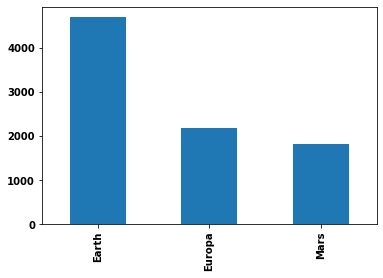

In [78]:
HomePlant = train_df['HomePlanet']
HomePlant.value_counts().plot(kind='bar')

In [79]:
cabin = train_df['Cabin']
cabin.value_counts() # pass this attributes

G/734/S     8
F/1194/P    8
B/82/S      7
G/657/P     7
F/1411/P    7
           ..
F/763/P     1
G/140/S     1
A/60/P      1
B/294/S     1
G/450/P     1
Name: Cabin, Length: 6560, dtype: int64

In [80]:
train_df['CryoSleep'].value_counts()


False    5569
True     3124
Name: CryoSleep, dtype: int64

In [81]:
train_df['Destination'].value_counts()

TRAPPIST-1e      6041
55 Cancri e      1836
PSO J318.5-22     816
Name: Destination, dtype: int64

In [82]:
print(train_df['Age'].value_counts())


18.0    328
24.0    326
21.0    313
22.0    303
23.0    300
       ... 
72.0      4
78.0      3
79.0      3
76.0      2
77.0      2
Name: Age, Length: 80, dtype: int64


In [83]:
print(train_df['VIP'].value_counts())


False    8491
True      202
Name: VIP, dtype: int64


In [84]:
print(train_df['RoomService'].value_counts())


0.0       5697
1.0        119
2.0         80
3.0         62
4.0         48
          ... 
1973.0       1
782.0        1
950.0        1
658.0        1
1174.0       1
Name: RoomService, Length: 1273, dtype: int64


In [85]:
print(train_df['FoodCourt'].value_counts())


0.0       5574
1.0        118
2.0         76
4.0         54
3.0         53
          ... 
3070.0       1
1170.0       1
627.0        1
1719.0       1
1174.0       1
Name: FoodCourt, Length: 1507, dtype: int64


In [86]:
print(train_df['ShoppingMall'].value_counts())


0.0       5727
1.0        157
2.0         81
3.0         60
4.0         45
          ... 
2728.0       1
396.0        1
2315.0       1
326.0        1
620.0        1
Name: ShoppingMall, Length: 1115, dtype: int64


In [87]:
print(train_df['Spa'].value_counts())


0.0       5435
1.0        152
2.0        108
3.0         54
5.0         53
          ... 
5432.0       1
4864.0       1
2043.0       1
3803.0       1
1159.0       1
Name: Spa, Length: 1327, dtype: int64


In [88]:
print(train_df['VRDeck'].value_counts())


0.0       5623
1.0        140
2.0         72
3.0         57
5.0         51
          ... 
3173.0       1
3726.0       1
519.0        1
1467.0       1
1174.0       1
Name: VRDeck, Length: 1306, dtype: int64


x的數據集屬性有id,HomePlanet,CryoSleep,Destination,Age

In [89]:
''' 
查看年紀和存活率有沒有相關性
使用的是皮爾遜相關係數
''' 

age = train_df['Age']
transported = train_df['Transported']
# print(age.shape,transported.shape)
# 負相關，一個變量的值越小另一個變量的值反而越小
print(age.corr(transported))



-0.07189101830149841


In [90]:
# print("空值有",age.isnull().sum())
# # 使用fillna補充空值
# # bfill 空值取前一個
# age.fillna(method='bfill',axis=0,inplace=True)
# print("空值有",age.isnull().sum())
from scipy.stats import pearsonr
coef,p = pearsonr(age,transported)
print(coef,p)

alpha = 0.4
if p > alpha:
    print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
    print('Samples are correlated (reject H0) p=%.3f' % p)


空值有 0
空值有 0
-0.07189101830149856 1.9386629123367487e-11
Samples are correlated (reject H0) p=0.000


In [91]:
print("空值有",age.isnull().sum())
# 使用fillna補充空值
# bfill 空值取前一個
age.fillna(method='bfill',axis=0,inplace=True)
print("空值有",age.isnull().sum())
from scipy.stats import pearsonr
coef,p = pearsonr(age,transported)

alpha = 0.4
if p > alpha:
    print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
    print('Samples are correlated (reject H0) p=%.3f' % p)


空值有 0
空值有 0
Samples are correlated (reject H0) p=0.000


In [92]:
'''使用斯皮尔曼秩相关系数再次計算age之間的相關性'''

from scipy.stats import spearmanr
coef,p = spearmanr(age,transported)
print(coef,p)
alpha = 0.05 

if p > alpha:
    print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
    print('Samples are correlated (reject H0) p=%.3f' % p)

-0.06722130922718975 3.526609955857696e-10
Samples are correlated (reject H0) p=0.000


In [101]:
'''使用肯德尔秩相关系数再次計算age之間的相關性'''

from scipy.stats import kendalltau
coef,p = kendalltau(age,transported)
print(coef,p)
alpha = 0.05 

if p > alpha:
    print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
    print('Samples are correlated (reject H0) p=%.3f' % p)

-0.055482225267958575 3.678271028780784e-10
Samples are correlated (reject H0) p=0.000


In [102]:
def cal_corr(df1,df2):
    
    coef,p = kendalltau(df1,df2)
    print(coef,p)
    alpha = 0.05 
        
    if p >alpha:
        print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
    else:
        print('Samples are correlated (reject H0) p=%.3f' % p)
    

In [103]:
cal_corr(train_df['VIP'],transported)

-0.03471549295975782 0.0012098126593006755
Samples are correlated (reject H0) p=0.001


In [109]:
for i in train_df:
    print(i,type(i))

PassengerId <class 'str'>
HomePlanet <class 'str'>
CryoSleep <class 'str'>
Cabin <class 'str'>
Destination <class 'str'>
Age <class 'str'>
VIP <class 'str'>
RoomService <class 'str'>
FoodCourt <class 'str'>
ShoppingMall <class 'str'>
Spa <class 'str'>
VRDeck <class 'str'>
Name <class 'str'>
Transported <class 'str'>
